Тоже алгоритм визуализации  
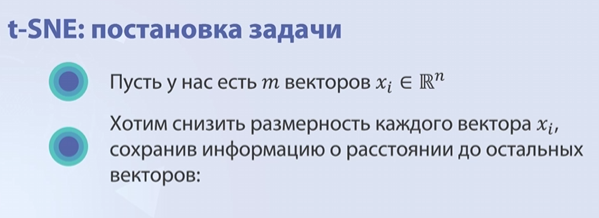  
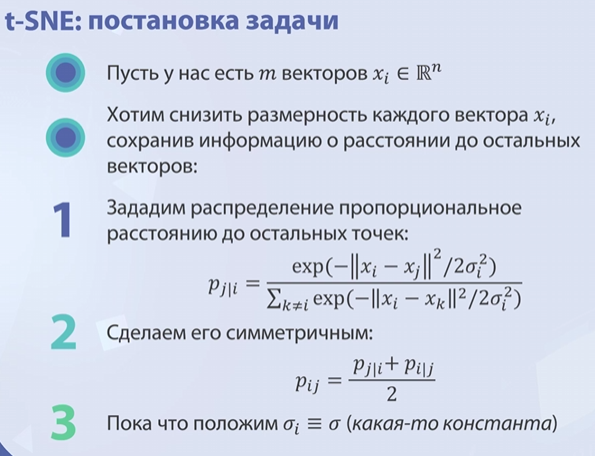  
Разберем формулу  (1)
$$
p_{i|j} = \frac{exp(-||x_i - x_j||^2/ 2 \sigma_i^2)}{\sum_{i \neq k} exp(- || x_i - x_k ||^2 / 2 \sigma_i^2)}
$$ 
Числитель $exp(-||x_i - x_j||^2/ 2 \sigma_i^2)$ по сути, если i-й и j-й элементы похожи, то разница стремится к нулю, а сама экспонента будет стремиться к 1  
Знаменатель - это сумма, по сути делением мы делаем распределение вероятностей
Представим, что мы фиксировали i - то есть конкретное вычисление говорит нам, насколько близка какая-либо точка в какой-либо другой точке  

Разберем формулу (2)  
Делаем распределенеи симметричным, сделаем так, что $p_{ij} = p_{ji}$  
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2}
$$  

Далее (3)  
Пока считаем, что $\sigma_i$ - это просто какая-то константа  
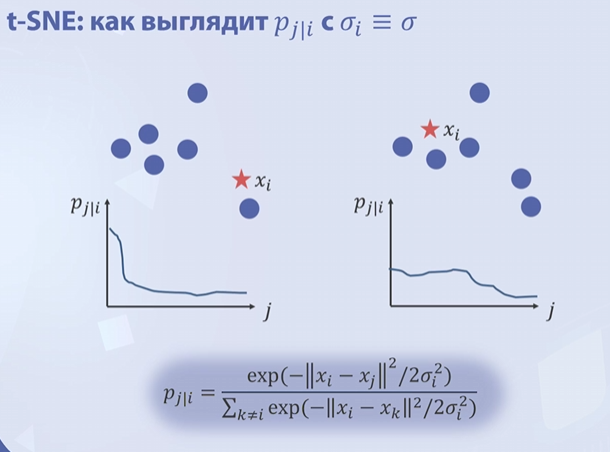  
На первом графике виден пик, когда звездочка сильно дальше от других - есть пик в распределении  
На второй графике звездочка попала в высокую плотность точек - график более ровный  
**Это происходит при $\sigma$ - константа**  
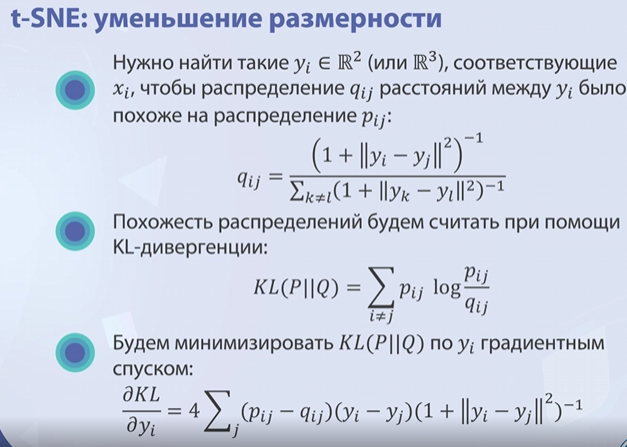  
То есть мы хотим найти такое пространство, чтобы распределение $q$ было похожим, но само оно меньшей размерности - сделать какое-то нелинейное преобразование  
Используем распределение стьюдента - оттуда и имя t-SNE  
Как сравнить распределения - с помощью KL-дивергенции  
И все сводится к тому, чтобы находить новые координаты точек так, чтобы KL-дивергенция минимизировалась  
Поэтому мы приходим к формуле градиентного спуска  
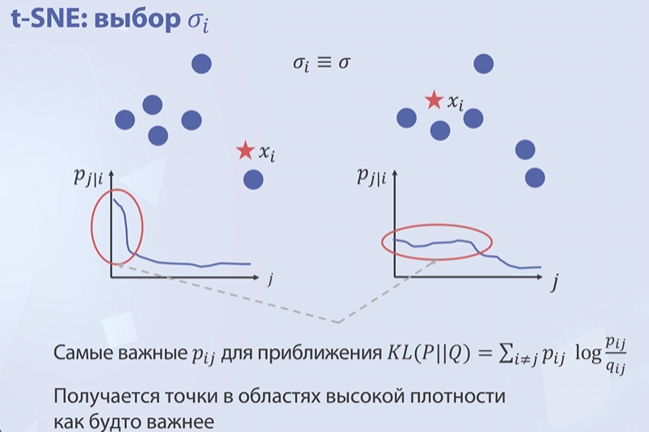  
При константном $\sigma$ получается так, что KL-дивергенция будет слабо подгоняться под значения, которые выходят за рамки высокой плотности значений. То есть формула с экспонентой будет выдавать мелкое значение на другие точки, и мы не будем особо стараться в оптимизации для этого значения, тем самым "затирая" информацию  
Минимизируя KL-д мы будем лучше описывать расстояния между точками в плотных частях гиперплоскости изначальных данных  
Поэтому надо подобрать $\sigma$
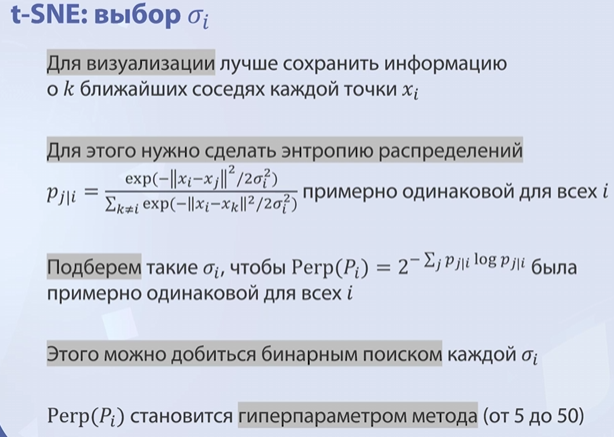  
Будем считать энтропию - она нам как раз таки говорит о плотности вероятностей, чем меньше энтропия, тем больше вероятность какого-то определенного значения и мы **хотим сохранить энтропию**
Но по сути мы используем кое-что другое, а $Prepr(P_i)2^{энтропия} = 2^{-\sum_j p_{i|j}log p_{i|j}}$ - перплексия  
И далее вуаля подбираем $\sigma$ так, чтобы перплексия варьировалась от 2 до 50  
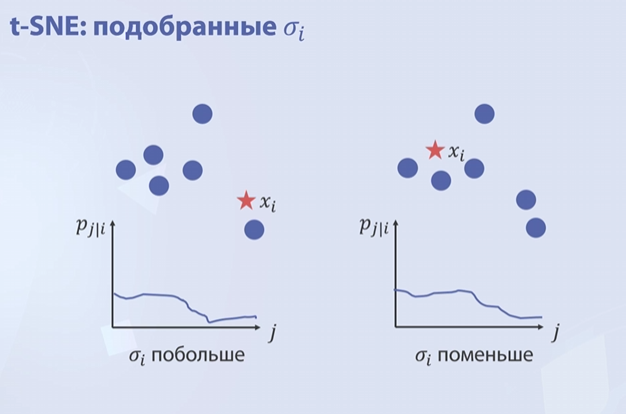  
По сути чем больше $\sigma$ - тем больше мы учитываем соседей, чем меньше значение, тем меньше соседей мы учитываем!  
Ищем мы $\sigma$ с помощью бинпоиска  
А далее запускаем градиентный спуск по KL-дивергенции  
Пример  
Задача MNIST - у нас картинки с цифрами от 0 до 9, размером 32 на 32  
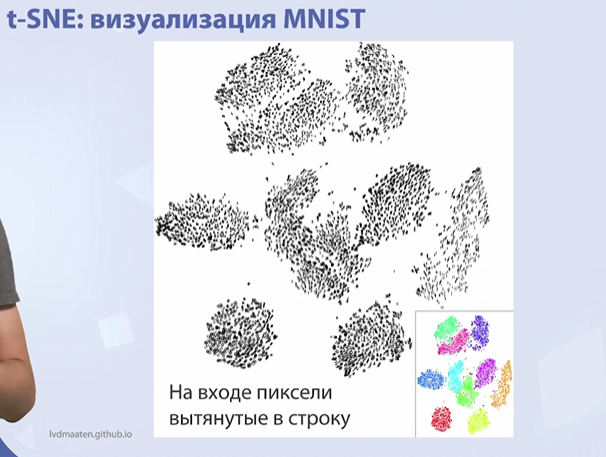  
То есть у нас всего у каждой картинки $32^2$ компонент - надо как-то визуализировать как распределены картинки, как нарисовать?  
С помощью t-SNE можно уменьшить размерность пространства  
Видны отдельные кластеры цифр  
Еще один пример  
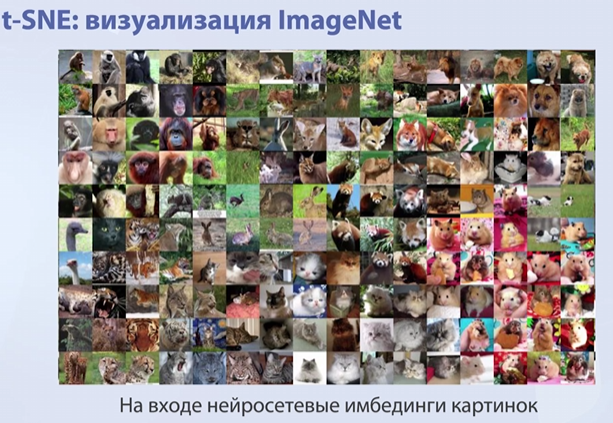  
Как классифицировать картинку? В общем тут с помозью t-sne кластеризовали картинки в такую карту  

Выводы  
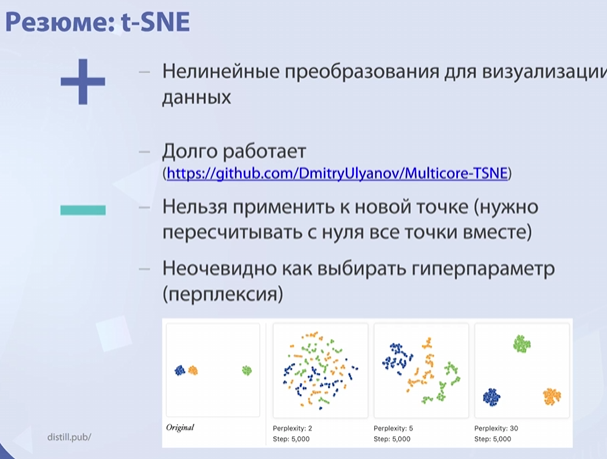  
Преобразования вообще нелинейные  